In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### Load the spreadsheets

In [2]:
# Load each sheet
august = pd.read_excel('usage_fall19.xlsx', sheet_name='AUG 2019')
september = pd.read_excel('usage_fall19.xlsx', sheet_name='SEPT 2019')
october = pd.read_excel('usage_fall19.xlsx', sheet_name='OCT 2019, pulled 10.15.19')

In [3]:
# Update some of the column names
august.rename(columns={'Teacher Resource Usage': 'reg_usage', 'Other Usage': 'other_usage'}, inplace=True)
september.rename(columns={'Teacher Resource Usage': 'reg_usage', 'Other Usage': 'other_usage'}, inplace=True)
october.rename(columns={'Teacher Resource Usage': 'reg_usage', 'Other Usage': 'other_usage'}, inplace=True)

In [4]:
# Change all dashes for usage into zeros
august.replace('--', '0', inplace=True)
september.replace('--', '0', inplace=True)
october.replace('--', '0', inplace=True)

In [5]:
# Convert usage numbers from string to integer
august[['reg_usage', 'other_usage']] = august[['reg_usage', 'other_usage']].astype('int64')
september[['reg_usage', 'other_usage']] = september[['reg_usage', 'other_usage']].astype('int64') 
october[['reg_usage', 'other_usage']] = october[['reg_usage', 'other_usage']].astype('int64') 

In [6]:
print('august shape: ', august.shape)
print('september shape: ', september.shape)
print('october shape: ', october.shape)

august shape:  (11283, 17)
september shape:  (11283, 17)
october shape:  (11301, 17)


### Initial glance

In [7]:
august[['reg_usage']].describe()

,reg_usage
count,11283.000000
mean,47.693255
std,82.361206
min,0.000000
25%,0.000000
50%,11.000000
75%,67.000000
max,2995.000000


In [8]:
september[['reg_usage']].describe()

,reg_usage
count,11283.000000
mean,95.272179
std,122.534036
min,0.000000
25%,0.000000
50%,55.000000
75%,149.000000
max,2630.000000


In [9]:
october[['reg_usage']].describe()

,reg_usage
count,11301.000000
mean,45.089461
std,63.635517
min,0.000000
25%,0.000000
50%,21.000000
75%,69.000000
max,992.000000


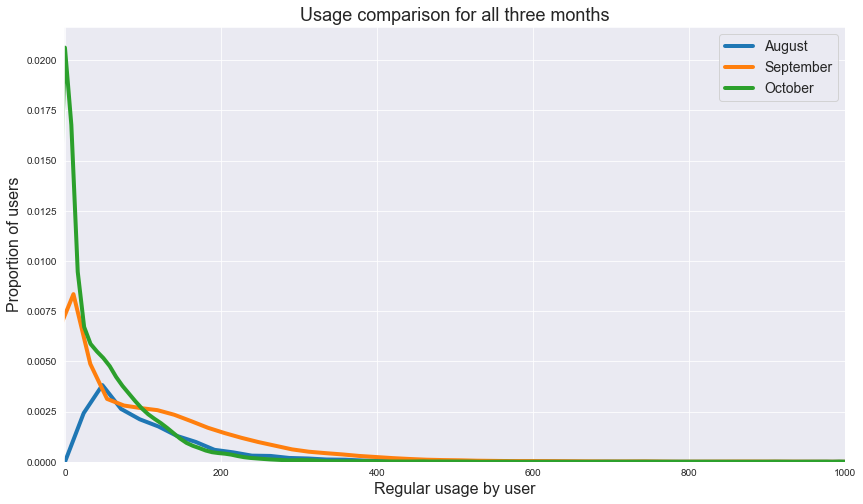

In [10]:
fig = plt.subplots(figsize = (14,8))

_ = sns.distplot(august.reg_usage, hist=False, label='August', kde_kws={'lw': 4})
_ = sns.distplot(september.reg_usage, hist=False, label='September', kde_kws={'lw': 4})
_ = sns.distplot(october.reg_usage, hist=False, label='October', kde_kws={'lw': 4})
_ = plt.xlabel('Regular usage by user', fontsize=16)
_ = plt.ylabel('Proportion of users', fontsize=16)
_ = plt.xlim(-2,1000)
_ = plt.title('Usage comparison for all three months', fontsize=18)
_ = plt.legend(fontsize=14)

It's important to note that the figures for October only cover half the month.

### Grouping

In [11]:
august['state'].fillna('undefined', inplace=True)
september['state'].fillna('undefined', inplace=True)
october['state'].fillna('undefined', inplace=True)

In [12]:
# no_states = august[august.state.isna()]
# print(no_states['district_name'].to_string())

In [12]:
#august.columns

In [14]:
august['user_count'] = august.groupby('district_name')['district_name'].transform('count')

In [15]:
#august.tail()

In [16]:
descr = august.groupby('district_name')['reg_usage'].describe()

In [13]:
#pd.DataFrame(desc).sort_values('count', ascending=False)

### September

Focusing on the month of September, likely the only month here with complete data.

In [14]:
september['distr_st_rep'] = september['rep'] + '*' + september['state'] + '*' + september['district_name']

In [15]:
s_desc = september.groupby('distr_st_rep')['reg_usage'].describe()
sept_stats = pd.DataFrame(s_desc).sort_values('count', ascending=False)

In [16]:
sept_stats

,count,mean,std,min,25%,50%,75%,max
distr_st_rep,,,,,,,,
Smith*FL*Miami-Dade County Public School District,564.0,2.762411,21.918149,0.0,0.0,0.0,0.0,393.0
Borland*CA*PALMDALE ELEMENTARY SCHOOL DISTRICT,282.0,3.276596,7.710146,0.0,0.0,0.0,2.0,57.0
Maddox*MD*PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS,241.0,72.443983,100.984683,0.0,0.0,23.0,115.0,560.0
Phillips*TX*DALLAS ISD,224.0,85.258929,118.546901,0.0,0.0,34.0,123.5,621.0
Phillips*TX*HOUSTON ISD,197.0,104.020305,160.343189,0.0,0.0,28.0,166.0,1120.0
...,...,...,...,...,...,...,...,...
Roman*FL*ST. JOHNS,1.0,272.000000,NaN,272.0,272.0,272.0,272.0,272.0
Maus*NE*GILTNER PUBLIC SCHOOLS,1.0,145.000000,NaN,145.0,145.0,145.0,145.0,145.0
Maddox*OH*BUCKEYE CENTRAL LOCAL,1.0,227.000000,NaN,227.0,227.0,227.0,227.0,227.0


In [17]:
sept_stats['above_avg'] = 'n'

In [18]:
sept_stats.loc[sept_stats['mean'] >= 95.272179, 'above_avg'] = 'y'

In [19]:
sept_stats

,count,mean,std,min,25%,50%,75%,max,above_avg
distr_st_rep,,,,,,,,,
Smith*FL*Miami-Dade County Public School District,564.0,2.762411,21.918149,0.0,0.0,0.0,0.0,393.0,n
Borland*CA*PALMDALE ELEMENTARY SCHOOL DISTRICT,282.0,3.276596,7.710146,0.0,0.0,0.0,2.0,57.0,n
Maddox*MD*PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS,241.0,72.443983,100.984683,0.0,0.0,23.0,115.0,560.0,n
Phillips*TX*DALLAS ISD,224.0,85.258929,118.546901,0.0,0.0,34.0,123.5,621.0,n
Phillips*TX*HOUSTON ISD,197.0,104.020305,160.343189,0.0,0.0,28.0,166.0,1120.0,y
...,...,...,...,...,...,...,...,...,...
Roman*FL*ST. JOHNS,1.0,272.000000,NaN,272.0,272.0,272.0,272.0,272.0,y
Maus*NE*GILTNER PUBLIC SCHOOLS,1.0,145.000000,NaN,145.0,145.0,145.0,145.0,145.0,y
Maddox*OH*BUCKEYE CENTRAL LOCAL,1.0,227.000000,NaN,227.0,227.0,227.0,227.0,227.0,y


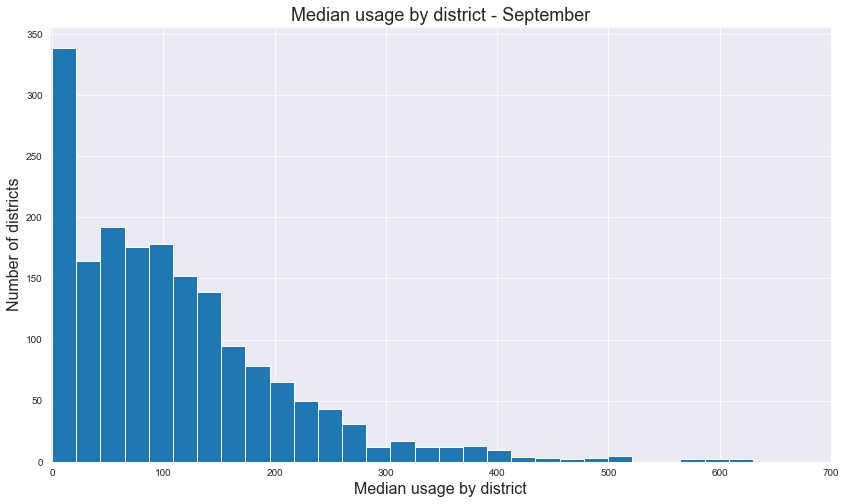

In [20]:
fig = plt.subplots(figsize = (14,8))
_ = plt.hist(sept_stats['50%'], bins=50)
_ = plt.xlabel('Median usage by district', fontsize=16)
_ = plt.ylabel('Number of districts', fontsize=16)
_ = plt.xlim(-2,700)
_ = plt.title('Median usage by district - September', fontsize=18)

In [21]:
count_y = len(sept_stats[sept_stats.above_avg == 'y'])
count_n = len(sept_stats[sept_stats.above_avg == 'n'])

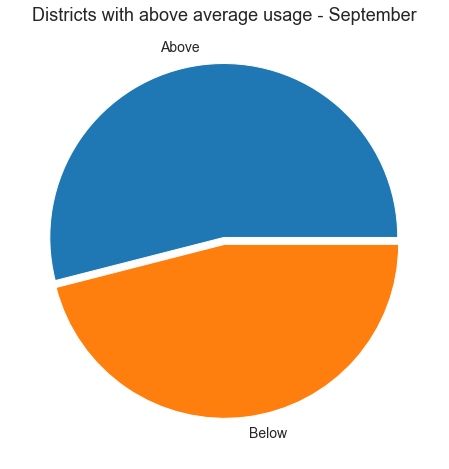

In [22]:
avg_cnts = [count_y, count_n]
labels = 'Above', 'Below'
explode = (0.04, 0)

fig = plt.subplots(figsize = (14,8))
_ = plt.pie(avg_cnts, explode=explode, labels=labels, textprops={'fontsize': 14})
#_ = plt.xlabel('Median usage by district', fontsize=16)
#_ = plt.ylabel('Number of districts', fontsize=16)
_ = plt.title('Districts with above average usage - September', fontsize=18)

In [23]:
count_zero = len(september[september.reg_usage == 0])
count_above_zero = len(september[september.reg_usage > 0])

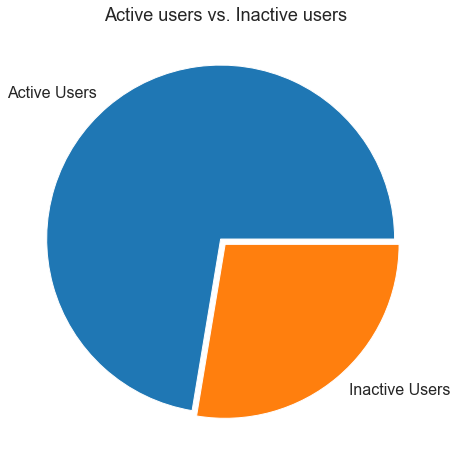

In [24]:
avg_cnts = [count_above_zero, count_zero]
labels = 'Active Users', 'Inactive Users'
explode = (0.04, 0)

fig = plt.subplots(figsize = (14,8))
_ = plt.pie(avg_cnts, explode=explode, labels=labels, textprops={'fontsize': 16})
_ = plt.title('Active users vs. Inactive users', fontsize=18)

#### Districts not above average

Filtering districts based on their mean usage and focusing on the ones that are below the cumulative average.

In [25]:
below = sept_stats[sept_stats.above_avg == 'n']
len(below)

831

In [90]:
#below = below[below['count'] > 0.0].sort_index()

In [93]:
wr = pd.ExcelWriter('usage_by_district.xlsx')

below.to_excel(wr, sheet_name='Below average districts')
sept_stats.to_excel(wr, sheet_name='Regular usage by district')

wr.save()

## Removing Zero Users

In [26]:
sept_above_zero = september[september.reg_usage > 0]

What are the usage stats for active users?

In [27]:
sept_above_zero[['reg_usage']].describe()

,reg_usage
count,8166.000000
mean,131.638011
std,126.327820
min,1.000000
25%,41.000000
50%,105.000000
75%,185.000000
max,2630.000000


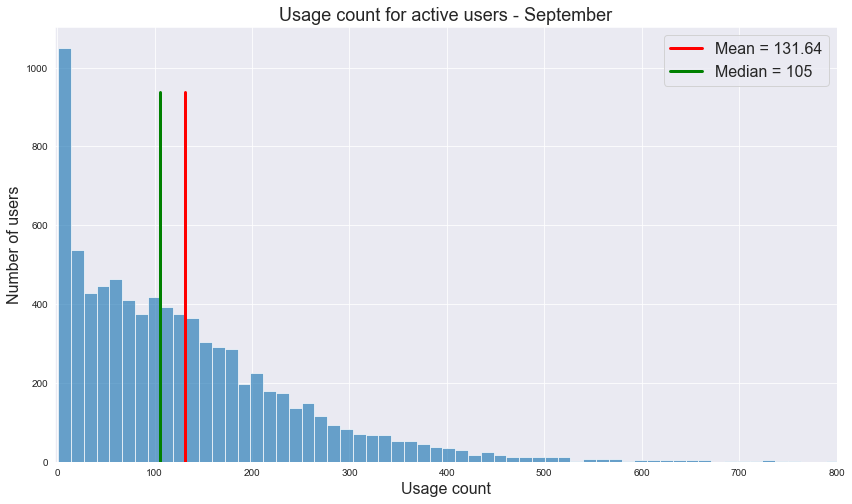

In [28]:
fig = plt.subplots(figsize = (14,8))
_ = plt.hist(sept_above_zero.reg_usage, bins=200, alpha=0.65)
_ = plt.axvline(x=131.64, c='r', ymax=0.85, linewidth=3, label='Mean = 131.64')
_ = plt.axvline(x=105, c='g', ymax=0.85, linewidth=3, label='Median = 105')
_ = plt.legend(fontsize=16)
_ = plt.xlabel('Usage count', fontsize=16)
_ = plt.ylabel('Number of users', fontsize=16)
_ = plt.xlim(-2,800)
_ = plt.title('Usage count for active users - September', fontsize=18)

<b>Quartiles for active users</b>

In [57]:
count_25 = len(sept_above_zero[sept_above_zero.reg_usage <= 41])
count_50 = len(sept_above_zero[(sept_above_zero.reg_usage > 41) & (sept_above_zero.reg_usage <= 105)])
count_75 = len(sept_above_zero[(sept_above_zero.reg_usage > 105) & (sept_above_zero.reg_usage <= 185)])
count_100 = len(sept_above_zero[sept_above_zero.reg_usage > 185])

In [65]:
# quarts = [count_25, count_50, count_75, count_100]
# labels = '25th percentile', '50th percentile', '75th percentile', '100th percentile'
# explode = (0.02, 0, 0, 0)

# fig = plt.subplots(figsize = (14,8))
# _ = plt.pie(quarts, explode=explode, labels=labels)
# _ = plt.title('Usage quartiles for active users', fontsize=18)
# _ = plt.rcParams['font.size'] = 18

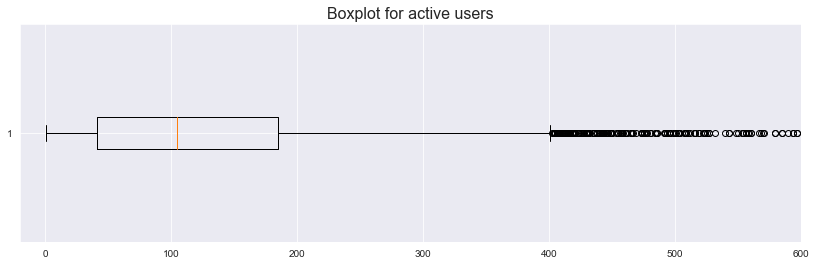

In [29]:
fig = plt.subplots(figsize = (14,4))
_ = plt.boxplot(sept_above_zero.reg_usage,\
               vert=False)
_ = plt.xlim(-20,600)
_ = plt.title('Boxplot for active users', fontsize=16)

<b>Active users by district</b>

In [30]:
above_zero_descr = sept_above_zero.groupby('distr_st_rep')['reg_usage'].describe()
above_zero_stats = pd.DataFrame(above_zero_descr).sort_values('count', ascending=False)

In [31]:
above_zero_stats.rename(columns={'count': 'active_users',\
                                 'mean': 'active_mean',\
                                '50%': 'active_med'}, inplace=True)

In [32]:
above_zero_stats.head()

,active_users,active_mean,std,min,25%,active_med,75%,max
distr_st_rep,,,,,,,,
Maddox*MD*PRINCE GEORGE'S COUNTY PUBLIC SCHOOLS,160.0,109.118750,106.611407,1.0,23.00,85.0,147.25,560.0
Phillips*TX*DALLAS ISD,148.0,129.040541,125.024073,1.0,36.25,95.5,171.00,621.0
Phillips*TX*HOUSTON ISD,123.0,166.601626,175.479004,1.0,48.50,136.0,205.00,1120.0
Borland*CA*PALMDALE ELEMENTARY SCHOOL DISTRICT,92.0,10.043478,10.717053,1.0,2.00,6.5,13.00,57.0
Maus*WI*WISCONSIN PRIVATE SCHOOLS,90.0,32.633333,58.949693,1.0,7.00,13.5,24.00,334.0


In [33]:
# Merge tables for all users and active users
sept_merged = sept_stats.merge(above_zero_stats, how='left', on='distr_st_rep', suffixes=('_all', '_active'))
sept_merged.fillna(0, inplace=True)

In [51]:
# Add columns for other above/below booleans
sept_merged['above_all_med'] = 'N'
sept_merged['above_act_mean'] = 'N'
sept_merged['above_act_med'] = 'N'

In [52]:
sept_merged.loc[sept_merged['50%'] >= 55, 'above_all_med'] = 'Y'
sept_merged.loc[sept_merged['active_mean'] >= 131.63, 'above_act_mean'] = 'Y'
sept_merged.loc[sept_merged['active_med'] >= 105, 'above_act_med'] = 'Y'

<b>Percent of users with above average usage</b>

In [37]:
pct_dict = {}

for d in sept_merged.index:
    pct_dict[d] = 0

In [46]:
sept_merged.index[0].split(sep='*')[2]

'Miami-Dade County Public School District'

In [55]:
sept_merged.head(1)

,count,mean,std_all,min_all,25%_all,50%,75%_all,max_all,above_avg,active_users,active_mean,std_active,min_active,25%_active,active_med,75%_active,max_active,above_all_med,above_act_mean,above_act_med
distr_st_rep,,,,,,,,,,,,,,,,,,,,
Smith*FL*Miami-Dade County Public School District,564.0,2.762411,21.918149,0.0,0.0,0.0,0.0,393.0,n,49.0,31.795918,68.500906,1.0,2.0,6.0,16.0,393.0,N,N,N


In [54]:
wr = pd.ExcelWriter('active_usage_by_district.xlsx')

sept_merged.to_excel(wr, sheet_name='Active usage by district')

wr.save()

<b>Max user</b>

In [98]:
import numpy as np

september[september.reg_usage == np.max(september.reg_usage)]

,user_id,username,people_id,person,email,school(s),daysLoggedIn,weekdaysLoggedIn,reg_usage,other_usage,license_district,order_district,district_name,state,rep,order(s),products,distr_st_rep
8165,288290,RYANBAN,35211,Tanuja Gomes,piyushp@fsm.net.in,Furtados School of Music,29,22,2630,0,1000000046,1.000000e+09,INTERNATIONAL PUBLIC SCHOOLS,XX,Smith,679712167,"QK5-01-01b,QGK-05-01b,QGK-03-01d",Smith-XX-INTERNATIONAL PUBLIC SCHOOLS
